[-2.87484692  0.25829596  0.04476824 -4.52013929  1.51419308  5.59471902
 20.77236153]


/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


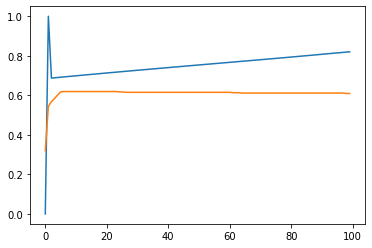

In [148]:
%matplotlib inline

import matplotlib 
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib .pyplot as plt

up=120
v_ini=[100,0,0,100,0]
t=np.arange(0,100,1)
O=0.0001  #酸素濃度（一定）

def func(t,k1, k2, k3, k4, k5, k6, K):
    def Hap(v,t, k1, k2, k3, k4, k5, k6):
        v0 = -k1*v[0]*O + k2*v[1]
        v1 = k1*v[0]*O - k2*v[1] - k3*v[2]*v[1] + k4*v[3] - k5*v[3]*v[1] + k6*v[4]
        v2 = -k3*v[2]*v[1] + k4*v[3]
        v3 = k3*v[2]*v[1] - k4*v[3] - k5*v[3]*v[1] + k6*v[4]
        v4 = k5*v[3]*v[1] - k6*v[4]
        return [v0,v1,v2,v3,v4]
    v=odeint(Hap,v_ini,t,args=(k1,k2,k3,k4,k5,k6) )
    transcript = [x/(x+K) for x in v[:,4]]
    return transcript

df = pd.read_csv('Fig2A_1step.csv',header=None)
x = np.array(df[0][:100])
y = np.array(df[1][:100])


popt, pcov = curve_fit(func, x, y,maxfev=10000)
print(popt)
plt.plot(t,func(t,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6]))
plt.plot(t,y)
plt.show()

[0.35233419 0.0457715  0.33469601 0.17511884 0.3497788  0.00128374
 0.33406676 0.69469713 0.46082118]


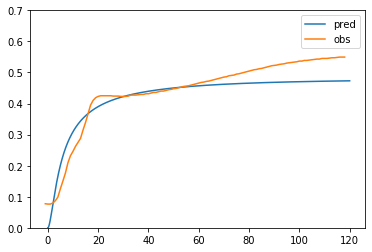

In [13]:
%matplotlib inline

import matplotlib 
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib .pyplot as plt


param_ini = [0.9955032249707431, 0.03216701347549755, 0.16746667657269187, 0.2768951557587751, 0.1774701733114541, 0.0044596505061225145, 0.6294790858484255, 0.4041695418619293, 0.16870296177776967]
param_bound = ([0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1]) 
t=np.arange(0,120,0.01)
O=200  #酸素濃度（一定）
v1i=0
v3i=0
v4i=0
def func(t,k1, k2, k3, k4, k5, k6, K, v0i,v2i):
    def Hap(v,t, k1, k2, k3, k4, k5, k6):
        v0 = -k1*v[0]*O + k2*v[1]
        v1 = k1*v[0]*O - k2*v[1] - k3*v[2]*v[1] + k4*v[3] - k5*v[3]*v[1] + k6*v[4]
        v2 = -k3*v[2]*v[1] + k4*v[3]
        v3 = k3*v[2]*v[1] - k4*v[3] - k5*v[3]*v[1] + k6*v[4]
        v4 = k5*v[3]*v[1] - k6*v[4]
        return [v0,v1,v2,v3,v4]
    v_ini=[v0i,v1i,v2i,v3i,v4i]
    v=odeint(Hap,v_ini,t,args=(k1,k2,k3,k4,k5,k6) )
    transcript = [x/(x+K) for x in v[:,4]]
    return transcript

df = pd.read_csv('Fig3A_1min_step.csv',header=None)
x = np.array(df[0])-1
y = np.array(df[1])


popt, pcov = curve_fit(func, x, y,maxfev=10000,p0=param_ini, bounds=param_bound)
print(popt)
plt.plot(t,func(t,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6],popt[7],popt[8]),label='pred')
plt.plot(x,y,label='obs')
plt.legend()
plt.ylim(0,0.70)
plt.show()

In [2]:
%matplotlib inline

import matplotlib 
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib .pyplot as plt
Os=[-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7]

def func(t,k1, k2, k3, k4, k5, k6, K):
    def Hap(v,t, k1, k2, k3, k4, k5, k6):
        v0 = -k1*v[0]*O + k2*v[1]
        v1 = k1*v[0]*O - k2*v[1] - k3*v[2]*v[1] + k4*v[3] - k5*v[3]*v[1] + k6*v[4]
        v2 = -k3*v[2]*v[1] + k4*v[3]
        v3 = k3*v[2]*v[1] - k4*v[3] - k5*v[3]*v[1] + k6*v[4]
        v4 = k5*v[3]*v[1] - k6*v[4]
        return [v0,v1,v2,v3,v4]
    ans=[]
    transcript = [x/(x+K) for x in v[:,4]]
    for x in Os:
        O=10**x
        v=odeint(Hap,v_ini,t,args=(O,k1,k2,k3,k4,k5,k6))
        ans.append(v[-1,4]/(v[-1,4]+K))
    return ans




NameError: name 'ans' is not defined